**Unsupervised Learning – Hierarchical Clustering Task**

Bronwyn Bowles-King

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [2]:
# Load data
df = pd.read_csv('Iris.csv',index_col=0)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Select features
X = df[['PetalLengthCm','PetalWidthCm']].values.reshape(-1,2)

print('Data size:', X.shape)

Data size: (150, 2)


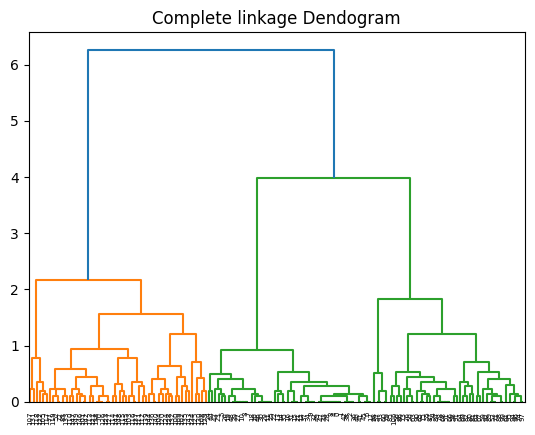

In [4]:
# Dendrogram using 'linkage' function from Scipy

plt.title("Complete linkage Dendogram")

dend_comp_link = dendrogram(linkage(X, method='complete'))

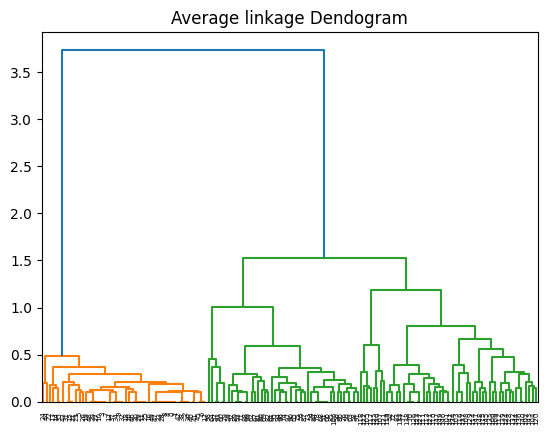

In [5]:
plt.title("Average linkage Dendogram")
dend_ave_link = dendrogram(linkage(X, method='average'))

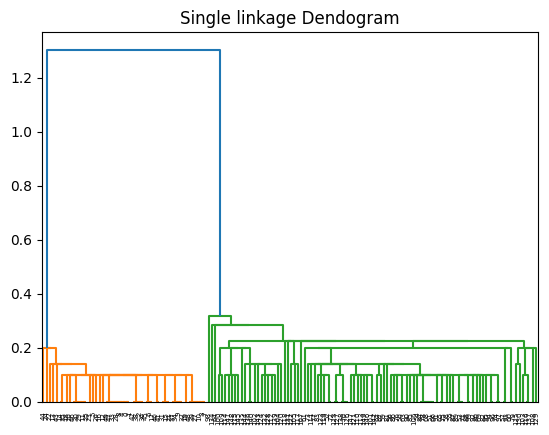

In [6]:
plt.title("Single linkage Dendogram")
dend_sing_link = dendrogram(linkage(X, method='single'))

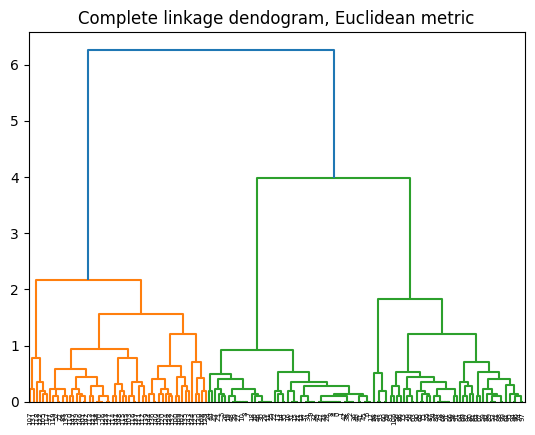

In [7]:
plt.title("Complete linkage dendogram, Euclidean metric")
dend_comp_eucl = dendrogram(linkage(X, method='complete', metric='euclidean'))

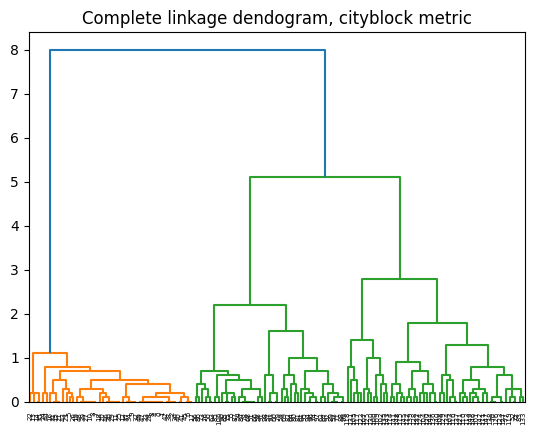

In [8]:
plt.title("Complete linkage dendogram, cityblock metric")
dend_comp_city = dendrogram(linkage(X, method='complete', metric='cityblock'))

In [9]:
# Agglomerative hierarchical clustering is run again with k = 3, complete linkage, and cityblock metric

# Initialise the model
model = AgglomerativeClustering(
    n_clusters = 3,
    linkage= 'complete',
    metric= 'cityblock'
)

# Fit to data
labels = model.fit_predict(X)

In [10]:
s_score = silhouette_score(X, labels, metric='cityblock')
print(f'Silhouette score: {s_score:.3f}')

Silhouette score: 0.674


**Conclusion**

Three clusters work best for this dataset and give the highest silhouette score. The Iris dataset indeed has three plant species, so there is consistency between the outcomes of agglomerative hierarchical clustering here and the dataset. The dendrograms consistently highlight this clustering, although not all parameters are as effective as the combination of complete linkage and the Manhattan (city block) distance. 

Complete linkage merges clusters based on the maximum distance between samples, favouring the nearest grouping of datapoints over the furthest pair in determining clusters. The city block distance calculates the sum of absolute differences between corresponding coordinates.